<a href="https://colab.research.google.com/github/aayush1607/Phishing_Detection/blob/main/Text_Based_Phishing_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

### 1. Dataset

https://www.kaggle.com/eswarchandt/phishing-website-detector

The overview of this dataset is, it has 11054 samples with 32 features. 

In [ ]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


### 2. Preprocessing

EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [ ]:
data = data.drop(['Index'],axis = 1)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


OBSERVATIONS:

There are 11054 instances and 31 fearures in dataset.  
Out of which 30 are independent features where as 1 is dependent feature.  
Each feature is in int datatype, so there is no need to use LabelEncoder.  
There is no outlier present in dataset.  
There is no missing value in dataset.


Visualizing

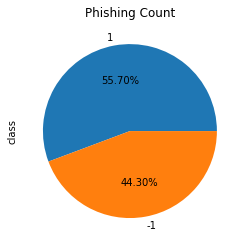

In [ ]:
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()


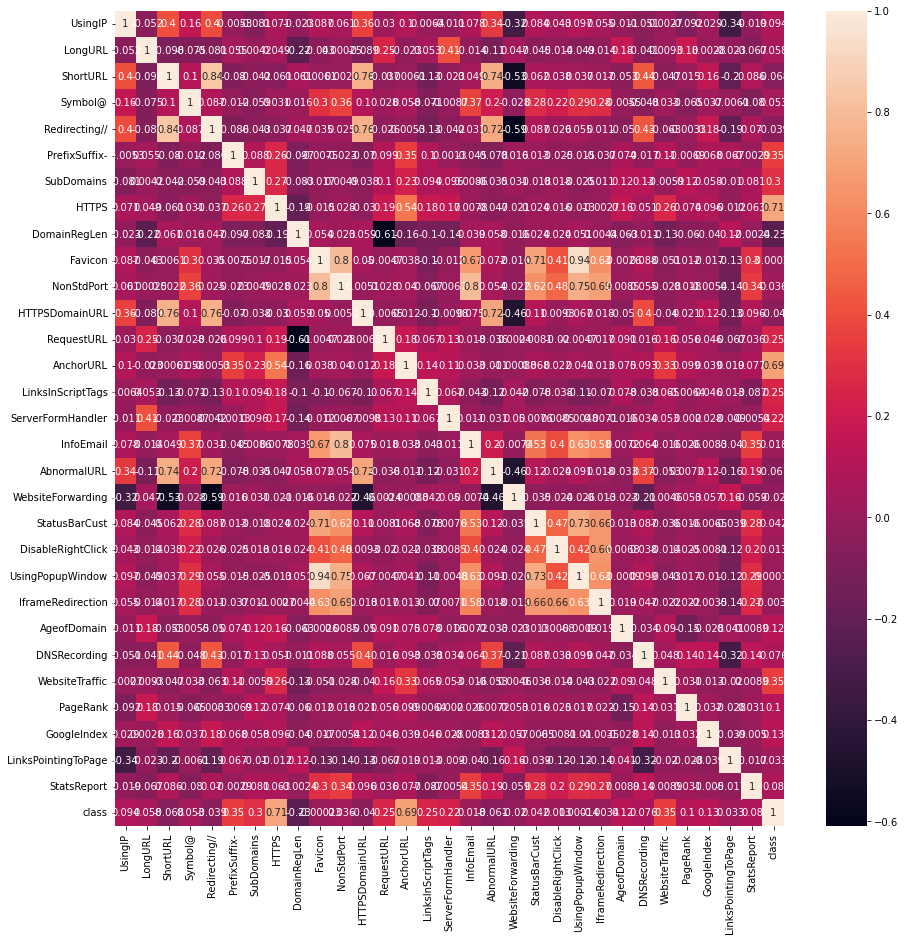

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()


Splitting

In [ ]:
X = data.drop(["class"],axis =1)
y = data["class"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

### 3.  Model Building & Training

In [ ]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

1. Decision Tree

In [ ]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)


In [ ]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.958



In [ ]:
f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962



In [ ]:
recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.959

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.966


In [ ]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [ ]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



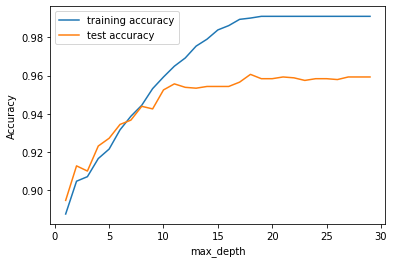

In [ ]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)
    tree_test.fit(X_train, y_train)
    training_accuracy.append(tree_test.score(X_train, y_train))
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();


2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.969



In [ ]:
f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.972



In [ ]:
recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.975

Random Forest : precision on training Data: 0.991
Random Forest : precision on test Data: 0.966


In [ ]:
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [ ]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



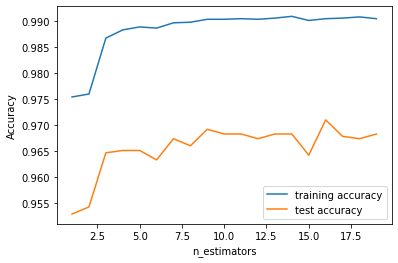

In [ ]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    training_accuracy.append(forest_test.score(X_train, y_train))
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [ ]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934



In [ ]:
f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()


Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941



In [ ]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



4. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [ ]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974



In [ ]:
f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977



In [ ]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



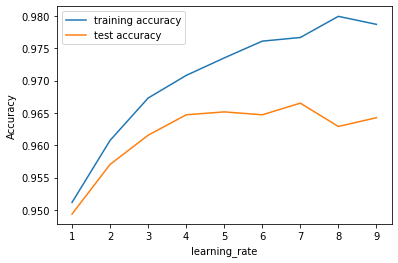

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();


5. XGBoosting

In [ ]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)


In [ ]:
acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()


XGBoost Classifier : Accuracy on training Data: 0.952
XGBoost Classifier : Accuracy on test Data: 0.952



In [ ]:
f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()


XGBoost Classifier : f1_score on training Data: 0.957
XGBoost Classifier : f1_score on test Data: 0.958



In [ ]:
recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

XGBoost Classifier : Recall on training Data: 0.968
XGBoost Classifier : Recall on test Data: 0.968



In [ ]:
precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))


XGBoost Classifier : precision on training Data: 0.947
XGBoost Classifier : precision on test Data: 0.947


### 4. Comparision

In [ ]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

NameError: ignored